**Sales Analysis Report Using Pandas**

## 1. Introduction

This analysis explores retail sales data from a consumer electronics store. The dataset includes thousands of purchase records with details such as:

- Order ID
- Product name
- Quantity ordered
- Price per item
- Order date and time
- Purchase address

### Goal of the Analysis:
The primary goal is to extract actionable business insights from this sales data, including:

- Identifying the **best month** for sales.
- Determining the **most profitable products**.
- Analyzing **city/sales performance**.
- Recommending the **best time of day** to advertise.
- Understanding which **products are sold most often** and **generate the most revenue**.

This report will help guide strategic decisions around marketing, inventory, and logistics.



## 2. Data Preparation

Before analyzing the sales data, it was necessary to clean and prepare the dataset to ensure accuracy and consistency.

### Steps Taken:

- **File Reading & Merging:**
  - Combined multiple monthly CSV files into one master DataFrame using `pd.concat`.

- **Data Cleaning:**
  - Removed rows with missing or null values.
  - Dropped header rows that were accidentally read as data (e.g., rows where 'Order Date' started with "Or").
  - Converted data types (e.g., `Quantity Ordered`, `Price Each`) to numeric.
  - Converted `Order Date` to datetime format for time-based analysis.

- **Creating new columns:**
  - Created new columns for:
    - `Month` – extracted from `Order Date`
    - `Sales` – calculated as `Quantity Ordered * Price Each`
    - `City` – extracted from `Purchase Address`
    - `Hour` and `Minute` – extracted from `Order Date`

This preparation ensured that the data was clean, structured, and ready for analysis.


In [1]:
import pandas as pd 
import os
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:/Users/akins/Downloads/Pandas-Data-Science-Tasks-master/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_April_2019.csv")

files = [file for file in os.listdir("C:/Users/akins/Downloads/Pandas-Data-Science-Tasks-master/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data")]

all_months_data = pd.DataFrame()

for file in files:
   df = pd.read_csv("C:/Users/akins/Downloads/Pandas-Data-Science-Tasks-master/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/"+file)
   all_months_data = pd.concat([all_months_data, df])
    
all_months_data.to_csv("all_data.csv", index=False)

In [3]:
all_data = pd.read_csv("all_data.csv")

In [4]:
all_data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101"
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301"
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"


 **Understanding the Data**

In [5]:
df.shape

(11686, 6)

In [6]:
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [7]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [8]:
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,11646,11646,11646,11646,11646,11646
unique,11208,20,7,24,9495,11032
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,17,1454,10490,1454,17,17


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11686 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          11646 non-null  object
 1   Product           11646 non-null  object
 2   Quantity Ordered  11646 non-null  object
 3   Price Each        11646 non-null  object
 4   Order Date        11646 non-null  object
 5   Purchase Address  11646 non-null  object
dtypes: object(6)
memory usage: 547.9+ KB


**Preparation and Cleaning of Data**

In [10]:
##Dropping irrelevant columns
df.isna().sum()

Order ID            40
Product             40
Quantity Ordered    40
Price Each          40
Order Date          40
Purchase Address    40
dtype: int64

In [11]:
nan_df = all_data[all_data.isna().any(axis=1)]

In [12]:
all_data =all_data.dropna(how="all")

In [13]:
all_data.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [14]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [15]:
all_data = all_data[all_data["Quantity Ordered"].str[0:2] != 'Qu']

**Convert columns to appropriate data types**

In [16]:
all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"])

all_data["Price Each"] = pd.to_numeric(all_data["Price Each"])

**Create new columns for better analysis**

In [17]:
###Creating "Month" column
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [18]:
###Error in adding "Month" column because the "Order Date" contains an unwanted and wrong data types 
Or_df = all_data[all_data["Order Date"].str[0:2]== "Or"]
Or_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month


In [19]:
###Cleaning the wrong data type and creating the additional Month column
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int')


In [20]:
### Adding Sales Column: Sales = Quantity Ordered multiply by Price 
all_data['Sales'] = all_data['Quantity Ordered'] * all_data["Price Each"]

In [21]:
### Generating City Column from Purchase Address

# Functions to extract City and State
def get_city(address):
    return address.split(',')[1].strip()

def get_state(address):
    return address.split(',')[2].strip().split(' ')[0]

# Combine City and State
all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")

In [22]:
### Checking if the new columns has been added

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


## 3. Exploratory Data Analysis (EDA)

This section answers key business questions using visualizations and summaries derived from the cleaned sales data.

---


### 3.1 What was the best month for sales?

By grouping the data by `Month` and summing the `Sales`, I determined which month generated the highest revenue.

- **Insight:** The 12th month which is "December" had the highest sales, likely due to holiday season demand.

In [23]:
###Question 1: What was the best month for sales? How much was earned that month?
monthly_sales = all_data.groupby("Month")["Sales"].sum()
monthly_sales.head(12)

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

In [24]:
best_month = monthly_sales.idxmax()
print(best_month)

12


In [25]:
best_month_earnings = monthly_sales.max()
print(best_month_earnings)

4613443.34


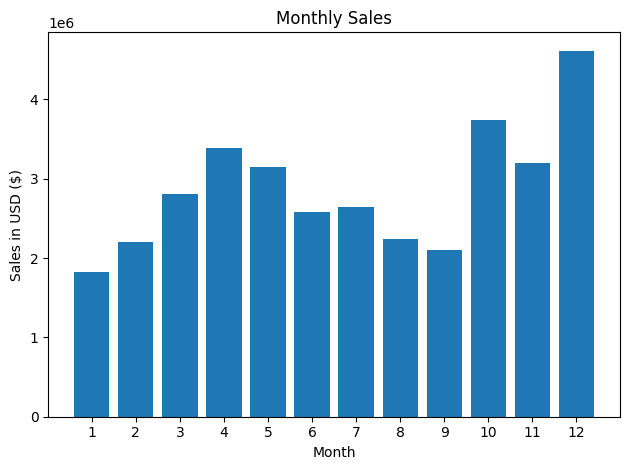

In [76]:
import matplotlib.pyplot as plt

months = range(1,13)

plt.bar(months, monthly_sales)
plt.xlabel("Month")
plt.xticks(months)
plt.ylabel("Sales in USD ($)")
plt.title("Monthly Sales")
plt.tight_layout()
plt.show()

### 3.2 What city had the highest number of sales?

Using the `City` extracted from the purchase address, I grouped by city and summed the sales to find the most profitable location.

- **Insight:** "San Francisco (CA)" had the highest total revenue, indicating a strong customer base in that region.


In [28]:
city_sales = all_data.groupby("City")["Sales"].sum()
city_sales

City
Atlanta (GA)          2795498.58
Austin (TX)           1819581.75
Boston (MA)           3661642.01
Dallas (TX)           2767975.40
Los Angeles (CA)      5452570.80
New York City (NY)    4664317.43
Portland (ME)          449758.27
Portland (OR)         1870732.34
San Francisco (CA)    8262203.91
Seattle (WA)          2747755.48
Name: Sales, dtype: float64

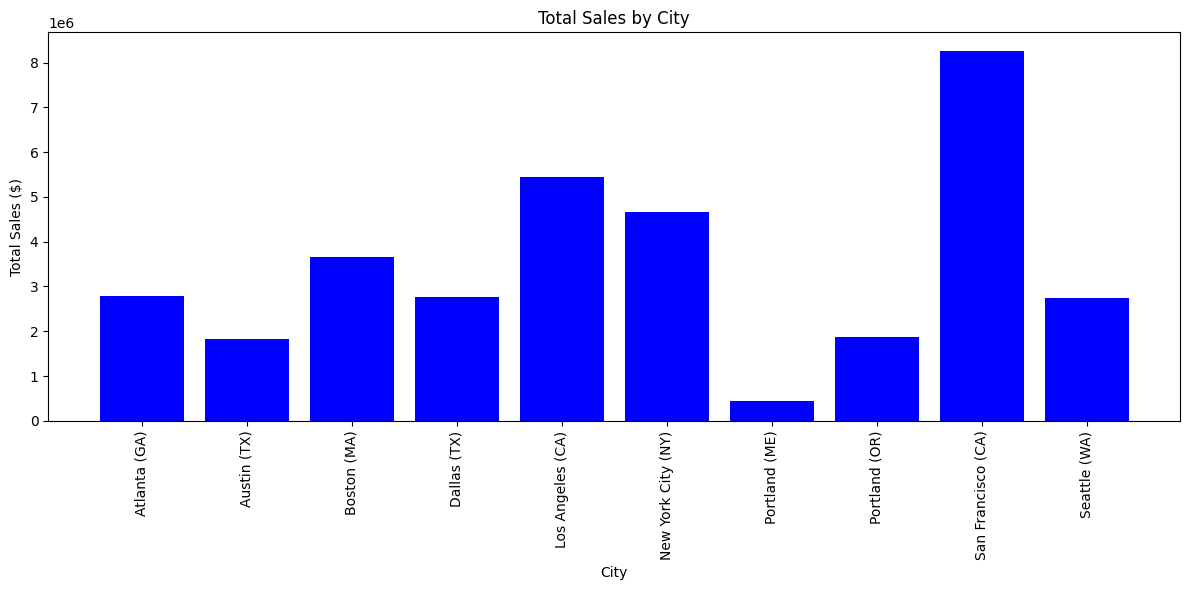

In [29]:
import matplotlib.pyplot as plt

# Group by City and sum sales
#city_sales = all_data.groupby('City')['Sales'].sum()

# Sort the values for a cleaner plot
#city_sales = city_sales.sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
plt.bar(city_sales.index, city_sales.values, color='blue')
plt.xticks(rotation='vertical')
plt.xlabel('City')
plt.ylabel('Total Sales ($)')
plt.title('Total Sales by City')
plt.tight_layout()  # Adjust layout to fit labels
plt.show()


### 3.3 What time do customers order the most?

I analyzed the number of orders placed at each hour of the day to identify peak purchase times.

- **Insight:** Orders peaked at  "11 AM and 7 PM", suggesting that advertisements should be displayed just before these times to increase visibility and conversion.

In [32]:
all_data["Order Date"] = pd.to_datetime(all_data["Order Date"])

C:\Users\akins\AppData\Local\Temp\ipykernel_2900\2617628323.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data["Order Date"] = pd.to_datetime(all_data["Order Date"])


In [33]:
all_data["Hour"] = all_data["Order Date"].dt.hour
all_data["Minute"] = all_data["Order Date"].dt.minute

In [34]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


In [35]:
all_data["Count"] = 1

In [36]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30,1
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,1
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27,1


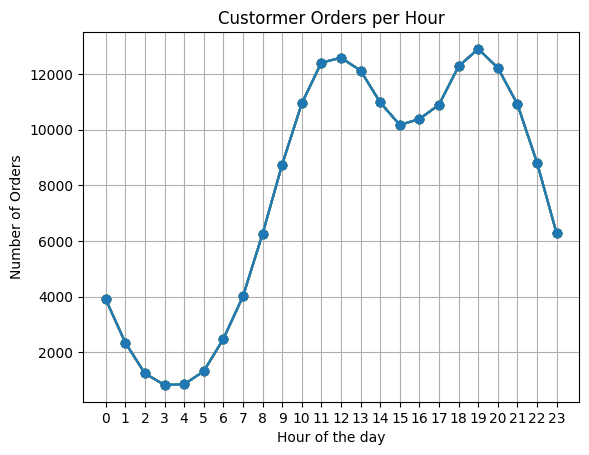

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Minute,Count
Hour,,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


In [43]:
hours = [hour for hour, df in all_data.groupby("Hour")]

plt.plot(hours, all_data.groupby(["Hour"]).count(), marker = "o", linestyle='-')
plt.xticks(hours)
plt.ylabel("Number of Orders")
plt.xlabel("Hour of the day")
plt.title("Custormer Orders per Hour")
plt.grid()
plt.show()

all_data.groupby(["Hour"]).count()


### 3.4 Which product sells the most by quantity?

I grouped the data by `Product` and summed `Quantity Ordered` to see which item was most frequently purchased.

- **Insight:** "AAA Batteries (4-pack)"" was the most sold product by quantity, likely due to high affordability and demand .

---

In [46]:
product_quantity = all_data.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False)
product_quantity



Product
AAA Batteries (4-pack)        31017
AA Batteries (4-pack)         27635
USB-C Charging Cable          23975
Lightning Charging Cable      23217
Wired Headphones              20557
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
27in FHD Monitor               7550
iPhone                         6849
27in 4K Gaming Monitor         6244
34in Ultrawide Monitor         6199
Google Phone                   5532
Flatscreen TV                  4819
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
20in Monitor                   4129
Vareebadd Phone                2068
LG Washing Machine              666
LG Dryer                        646
Name: Quantity Ordered, dtype: int64

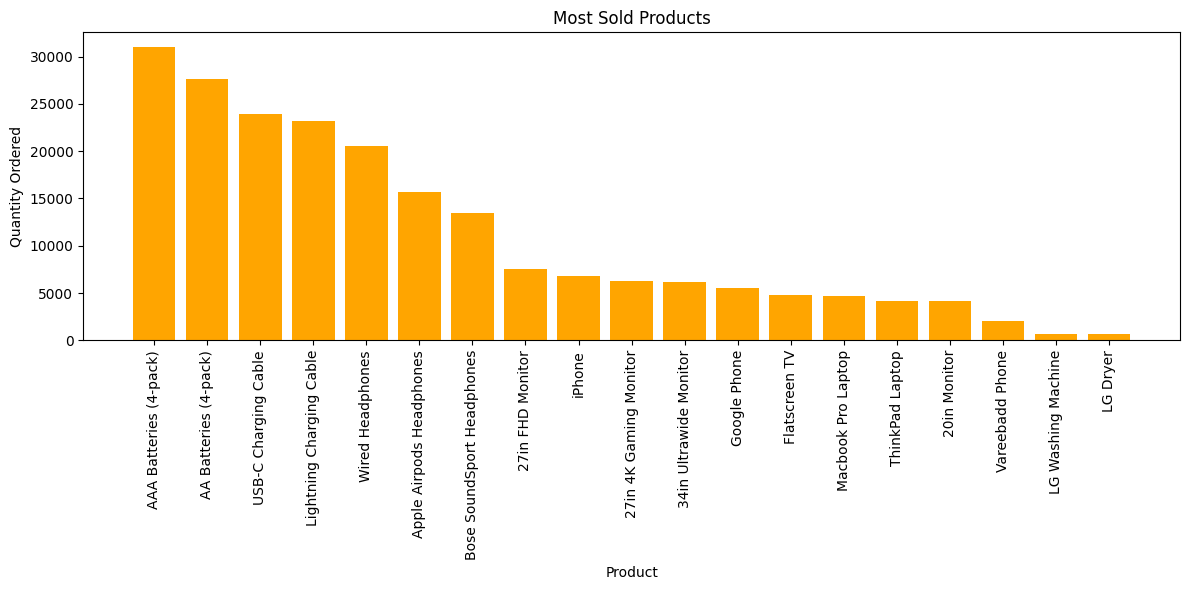

In [75]:
#plot

products = product_quantity.index
quantities = product_quantity.values
plt.figure(figsize=(12,6))
plt.bar(products, quantities, color="Orange")
plt.xlabel("Product")
plt.xticks(rotation = 90)
plt.ylabel("Quantity Ordered")
plt.title("Most Sold Products")
plt.tight_layout()
plt.show()


###  3.5 Which product generates the most revenue?

By grouping the data by `Product` and summing the `Sales`, I identified the top revenue-generating item.

- **Insight:**  "MacBook Pro Laptop" contributed the highest to total revenue despite lower quantity sold, due to its high unit price.

In [73]:
revenue_per_product = all_data.groupby('Product')['Sales'].sum().sort_values(ascending=False)
revenue_per_product


Product
Macbook Pro Laptop            8037600.00
iPhone                        4794300.00
ThinkPad Laptop               4129958.70
Google Phone                  3319200.00
27in 4K Gaming Monitor        2435097.56
34in Ultrawide Monitor        2355558.01
Apple Airpods Headphones      2349150.00
Flatscreen TV                 1445700.00
Bose SoundSport Headphones    1345565.43
27in FHD Monitor              1132424.50
Vareebadd Phone                827200.00
20in Monitor                   454148.71
LG Washing Machine             399600.00
LG Dryer                       387600.00
Lightning Charging Cable       347094.15
USB-C Charging Cable           286501.25
Wired Headphones               246478.43
AA Batteries (4-pack)          106118.40
AAA Batteries (4-pack)          92740.83
Name: Sales, dtype: float64

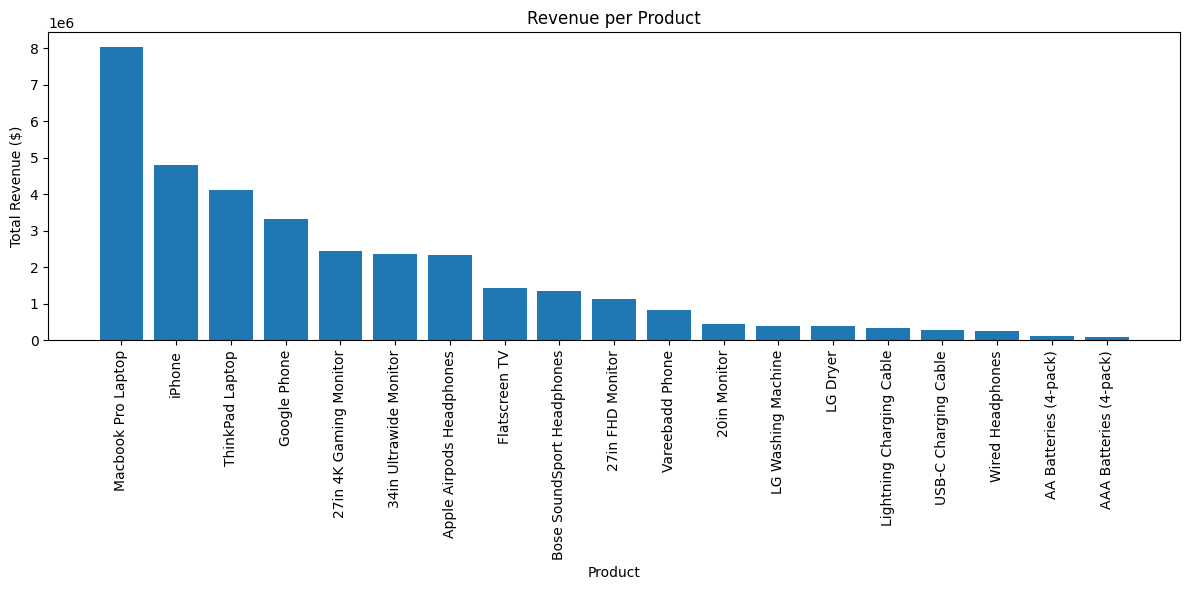

In [74]:
#plot

plt.figure(figsize=(12,6))
plt.bar(revenue_per_product.index, revenue_per_product.values)
plt.xlabel("Product")
plt.ylabel("Total Revenue ($)")
plt.title("Revenue per Product")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
